In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

import platform
plt.rc('font',family='Malgun Gothic')

In [2]:
# train data
dummy_data = pd.read_csv('input/train.csv')
# test data
dummy_test = pd.read_csv('input/test.csv')

In [3]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11769 entries, 0 to 11768
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   no         11769 non-null  int64  
 1   모델명        11769 non-null  object 
 2   연월         11769 non-null  object 
 3   연식         11769 non-null  float64
 4   연료         11769 non-null  object 
 5   주행거리       11769 non-null  object 
 6   인승         765 non-null    float64
 7   최대출력(마력)   10644 non-null  float64
 8   기통         8698 non-null   float64
 9   최대토크(kgm)  10545 non-null  float64
 10  구동방식       10808 non-null  object 
 11  자동수동       1313 non-null   object 
 12  국산/수입      11769 non-null  object 
 13  신차가(만원)    9544 non-null   float64
 14  가격(만원)     11769 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 1.3+ MB


In [4]:
dummy_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5789 entries, 0 to 5788
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   no         5789 non-null   int64  
 1   모델명        5789 non-null   object 
 2   연월         5789 non-null   object 
 3   연식         5789 non-null   float64
 4   연료         5789 non-null   object 
 5   주행거리       5789 non-null   object 
 6   인승         389 non-null    float64
 7   최대출력(마력)   5237 non-null   float64
 8   기통         4275 non-null   float64
 9   최대토크(kgm)  5183 non-null   float64
 10  구동방식       5312 non-null   object 
 11  자동수동       665 non-null    object 
 12  국산/수입      5789 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 588.1+ KB


In [5]:
dummy_data.isnull().sum()
# total -> 11769 
# 인승, 자동수동 결측치가 많다

no               0
모델명              0
연월               0
연식               0
연료               0
주행거리             0
인승           11004
최대출력(마력)      1125
기통            3071
최대토크(kgm)     1224
구동방식           961
자동수동         10456
국산/수입            0
신차가(만원)       2225
가격(만원)           0
dtype: int64

In [6]:
dummy_test.isnull().sum() #total 5789, 인승, 자동수동 NAN 많다

no              0
모델명             0
연월              0
연식              0
연료              0
주행거리            0
인승           5400
최대출력(마력)      552
기통           1514
최대토크(kgm)     606
구동방식          477
자동수동         5124
국산/수입           0
dtype: int64

In [7]:
### 데이터 전처리
# NaN 제거
clean_data = dummy_data.copy(deep=True)
clean_test = dummy_test.copy(deep=True)
# no, 인승,자동수동, 신차가, 연월 제거
clean_data.drop(columns=['no','인승','자동수동','신차가(만원)','연월'],inplace=True)
clean_test.drop(columns=['no','인승','자동수동','연월'],inplace=True)

clean_data = clean_data.reset_index(drop = True)
clean_test = clean_test.reset_index(drop = True)
#clean_data.shape #(11769,15) -> (11769, 10)
clean_test.shape #(5789,12) -> (5789, 9)

(5789, 9)

In [8]:
# 차종류 수 정의
len(np.unique(list(clean_data.모델명))) #1741

# 차종에서 브랜드만 남기고 제거
names = list(clean_data.모델명)
for i in range(len(names)):
    names[i] = names[i].split(' ',1)[0]
clean_data.모델명 = names
#clean_data.head() # ex> 현대, 기아 ...



# 차종에서 브랜드만 남기고 제거
test_names = list(clean_test.모델명)
for i in range(len(test_names)):
    test_names[i] = test_names[i].split(' ',1)[0]
clean_test.모델명 = test_names
#clean_test.head() # ex> 현대, 기아 ...
len(np.unique(list(clean_data.모델명))) # 97
#len(np.unique(list(clean_test.모델명))) # 58

97

In [9]:
np.unique(list(clean_data.모델명))

array(['CT&T', 'EHLC', 'FNS', 'GM대우', 'JS', 'JY', 'KCM', 'PINKAR', '거화',
       '경인', '글로밴', '기아', '나르미', '다솜', '다온', '다온포스', '대한', '동아', '두성',
       '듀오탑', '드비앙', '라헬', '레이모', '로드윈', '르노삼성', '맥스', '메이저', '모터라이프',
       '밴텍', '밴텍아톰', '벤텍', '벤텍R', '비에프엘', '삼일', '새한', '샤크', '성우', '세정',
       '세진', '쉐보레', '스내일', '스타라인', '스타렉스', '스타모빌', '스타캠프', '스페이스', '신광수인',
       '신화', '쌍용', '씨맥스', '씨티', '아리아모빌', '아트원', '어울림모터스', '에드윈', '에어밴',
       '에이스', '에이스캠퍼', '영남', '오딧', '오딧세이', '오텍', '오토캠프', '우주', '위크캠프',
       '유니버스', '유로스타', '유림', '익스플로러', '정립', '정박형', '제네시스', '제일모빌', '지바',
       '지안', '창림', '카라원', '카스오토', '카인드아크', '캠핑나들이', '캠핑스토리', '캠핑카',
       '캠핑카마스터', '컴바이컴', '케이씨', '케이씨노블', '케이원', '코반', '타이어프로', '타임에스',
       '팀', '프리미엄', '하이렉스', '한신', '현대', '홍성', '힐랜더'], dtype='<U6')

In [10]:
#주행거리 object -> float
clean_data.rename(columns={'가격(만원)':'가격'},inplace=True)
distance_driven = list(clean_data.주행거리)
distance_price = list(clean_data.가격)
for i in range(len(names)):
    
    if '만' in distance_driven[i]:
        if 'k' in distance_driven[i]:
            distance_driven[i] = distance_driven[i][0:distance_driven[i].find('만')] + '0000'
        elif 'ml' in distance_driven[i]:
            distance_driven[i] = str(float(distance_driven[i][0:distance_driven[i].find('만')])*16093.44)
    elif '천' in distance_driven[i]:
        if 'k' in distance_driven[i]:
            distance_driven[i] = distance_driven[i][0:distance_driven[i].find('천')] + '000'
        elif 'ml' in distance_driven[i]:
            distance_driven[i] = str(float(distance_driven[i][0:distance_driven[i].find('천')])*1609.344)
    elif '등' in distance_driven[i]: # 가장 안좋은듯
        distance_driven[i] = '100'+str(i%10)+'00'
        #print(distance_driven[i])
    elif 'k' in distance_driven[i]:
        distance_driven[i] = distance_driven[i][0:distance_driven[i].find('k')]
    elif 'ml' in distance_driven[i]:
        distance_driven[i] = str(float(distance_driven[i][0:distance_driven[i].find('m')])*1.609344)
        
clean_data.주행거리 = distance_driven
clean_data["주행거리"] = clean_data["주행거리"].astype(float)

#clean_data.dtypes


test_distance_driven = list(clean_test.주행거리)

for i in range(len(test_names)):
    if '만' in test_distance_driven[i]:
        if 'k' in test_distance_driven[i]:
            test_distance_driven[i] = test_distance_driven[i][0:test_distance_driven[i].find('만')] + '0000'
        elif 'ml' in test_distance_driven[i]:
            test_distance_driven[i] = str(float(test_distance_driven[i][0:test_distance_driven[i].find('만')])*1.609344)
    elif '천' in test_distance_driven[i]:
        if 'k' in test_distance_driven[i]:
            test_distance_driven[i] = test_distance_driven[i][0:test_distance_driven[i].find('천')] + '000'
        elif 'ml' in test_distance_driven[i]:
            test_distance_driven[i] = str(float(test_distance_driven[i][0:test_distance_driven[i].find('천')])*1.609344)
    elif '등' in test_distance_driven[i]:
        #test_distance_driven[i] = test_distance_driven[i][0:test_distance_driven[i].find('등')] + '0'
        test_distance_driven[i] = '100'+str(i%10)+'00'
        
    elif 'k' in test_distance_driven[i]:
        test_distance_driven[i] = test_distance_driven[i][0:test_distance_driven[i].find('k')]
    elif 'ml' in test_distance_driven[i]:
        test_distance_driven[i] = str(float(test_distance_driven[i][0:test_distance_driven[i].find('m')])*1.609344)
       # print(test_distance_driven[i])
    

clean_test.주행거리 = test_distance_driven

clean_test["주행거리"] = clean_test["주행거리"].astype(float)
#clean_test.dtypes

In [11]:
#clean_data.isnull().sum()
clean_test.isnull().sum()

모델명             0
연식              0
연료              0
주행거리            0
최대출력(마력)      552
기통           1514
최대토크(kgm)     606
구동방식          477
국산/수입           0
dtype: int64

In [12]:
clean_data['구동방식'].value_counts(dropna = False)  

FF     7333
FR     2319
NaN     961
4WD     688
AWD     452
MR       13
RR        3
Name: 구동방식, dtype: int64

In [13]:
# 구동방식 NAN -> NAN 바로 앞 값으로 치환
clean_data['구동방식'].fillna(method='ffill',inplace = True)
clean_data.isnull().sum() 

모델명             0
연식              0
연료              0
주행거리            0
최대출력(마력)     1125
기통           3071
최대토크(kgm)    1224
구동방식            0
국산/수입           0
가격              0
dtype: int64

In [14]:
# 최대출력(마력) NAN -> 평균값 치환
mean_age = clean_data['최대출력(마력)'].mean()
clean_data['최대출력(마력)'].fillna(mean_age,inplace=True)

In [15]:
clean_data['기통'].value_counts(dropna = False)  

4.0    5621
NaN    3071
6.0    2459
3.0     402
8.0     171
5.0      45
Name: 기통, dtype: int64

In [16]:
clean_data['기통'].fillna(method='ffill',inplace = True)
# 기통 NAN -> NAN 바로 앞 값으로 치환
clean_data['기통'].value_counts(dropna = False)  

4.0    7595
6.0    3326
3.0     544
8.0     245
5.0      59
Name: 기통, dtype: int64

In [17]:
# 최대토크(kgm) NAN -> 평균값 치환
mean_age = clean_data['최대토크(kgm)'].mean()
clean_data['최대토크(kgm)'].fillna(mean_age,inplace=True)

In [18]:
clean_data.isnull().sum()

모델명          0
연식           0
연료           0
주행거리         0
최대출력(마력)     0
기통           0
최대토크(kgm)    0
구동방식         0
국산/수입        0
가격           0
dtype: int64

In [19]:
print(clean_data.shape) #(11769, 10)

(11769, 10)


In [20]:
# object별로 나누기
clean_data = pd.get_dummies(clean_data,prefix_sep='_',drop_first=True)
clean_test = pd.get_dummies(clean_test,prefix_sep='_',drop_first=True)

In [21]:

print(clean_data.shape) #(11769, 117)

(11769, 117)


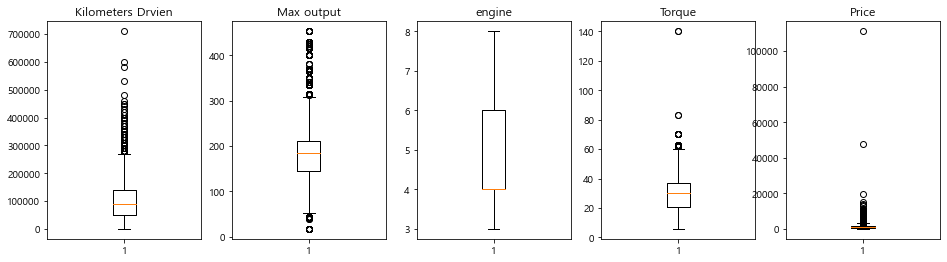

In [22]:
# Outlier 확인
clean_data.rename(columns={'최대출력(마력)':'최대출력'},inplace=True)
clean_data.rename(columns={'최대토크(kgm)':'최대토크'},inplace=True)
clean_data.rename(columns={'가격(만원)':'가격'},inplace=True)
clean_test.rename(columns={'최대출력(마력)':'최대출력'},inplace=True)
clean_test.rename(columns={'최대토크(kgm)':'최대토크'},inplace=True)
clean_test.rename(columns={'가격(만원)':'가격'},inplace=True)


fig, ax = plt.subplots(1,5,figsize=(16,4))
ax[0].boxplot(list(clean_data.주행거리))
ax[0].set_title("Kilometers Drvien")

ax[1].boxplot(list(clean_data.최대출력))
ax[1].set_title("Max output")

ax[2].boxplot(list(clean_data.기통))
ax[2].set_title("engine")

ax[3].boxplot(list(clean_data.최대토크))
ax[3].set_title("Torque")

ax[4].boxplot(list(clean_data.가격))
ax[4].set_title("Price")

plt.show()

#Price에서 한 두개가 유독 값이 큼 -> 버리자

C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


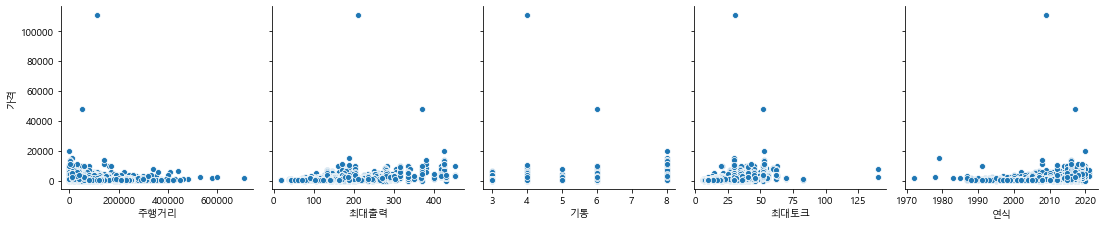

In [23]:
sns.pairplot(data=clean_data,x_vars=['주행거리','최대출력','기통','최대토크','연식'],y_vars='가격',size=3)

In [24]:
#Price가 40000 이상 제거
idx = []
lt = list(clean_data["가격"])
for i in range(len(lt)):
    if lt[i] > 17000:
        idx.append(i)
clean_data = clean_data.drop(idx)
clean_data = clean_data.reset_index(drop=True)

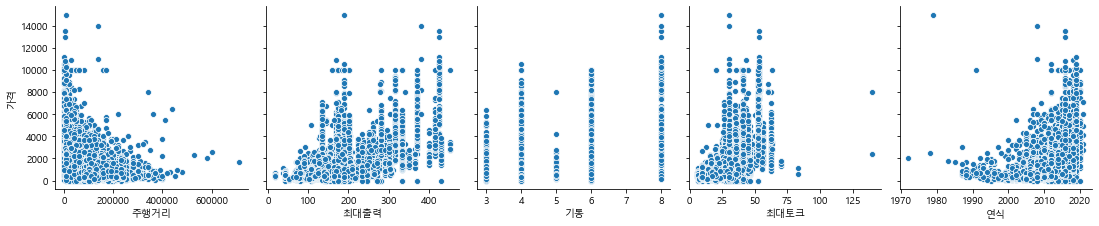

In [25]:
#sns.pairplot(data=clean_data,x_vars=['주행거리','최대출력','기통','최대토크','연식'],y_vars='가격',size=3)
sns.pairplot(data=clean_data,x_vars=['주행거리','최대출력','기통','최대토크','연식'],y_vars='가격',size=3)


In [26]:
clean_data.head()

,연식,주행거리,최대출력,기통,최대토크,가격,모델명_EHLC,모델명_FNS,모델명_GM대우,모델명_JS,...,연료_가솔린/LPG겸용,연료_기타,연료_디젤,연료_수소,연료_전기,구동방식_AWD,구동방식_FF,구동방식_FR,구동방식_MR,구동방식_RR
0,2013.0,40000.0,201.0,4.0,25.5,1870.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,2010.0,90000.0,157.0,4.0,20.0,700.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2015.0,30000.0,202.0,4.0,45.0,2990.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,2008.0,160000.0,151.0,4.0,33.8,420.0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,2004.0,160000.0,103.0,4.0,24.0,450.0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [27]:
clean_test.head()

,연식,주행거리,최대출력,기통,최대토크,모델명_LM,모델명_MIRAGE,모델명_MVP,모델명_글로밴,모델명_기아,...,연료_가솔린+전기,연료_가솔린/CNG겸용,연료_가솔린/LPG겸용,연료_기타,연료_디젤,연료_전기,구동방식_AWD,구동방식_FF,구동방식_FR,구동방식_MR
0,2020.0,8000.0,278.0,NaN,60.0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,2015.0,90000.0,163.0,4.0,36.7,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,2012.0,110000.0,201.0,4.0,25.5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2016.0,20000.0,78.0,NaN,9.6,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,2017.0,10000.0,NaN,4.0,NaN,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
#np.unique(list(clean_data))
#clean_data.append([{'모델명_오페라':0, '모델명_서광':0, '모델명_카인드아크코리아':0, '모델명_바나나':0, '모델명_세렌디피티':0, '모델명_LM':0, '모델명_MVP':0, '모델명_맥스리무진':0, '모델명_모빌':0, '모델명_MIRAGE':0, '모델명_렉스온':0, '모델명_애드카티브이':0, '모델명_캠핑나드리':0, '모델명_오토':0, '모델명_밴텍R':0, '모델명_세정에포스캠핑카':0, '모델명_카인드':0, '모델명_대우':0, '모델명_한울':0, '모델명_화이트':0, '모델명_자동차시대':0, '모델명_케이씨모터스':0}])
#clean_data.append([{'모델명_맥스리무진':0, '모델명_대우':0, '모델명_화이트':0, '모델명_밴텍R':0, '모델명_한울':0, '모델명_세렌디피티':0, '모델명_세정에포스캠핑카':0, '모델명_애드카티브이':0, '모델명_카인드아크코리아':0, '모델명_모빌':0, '모델명_케이씨모터스':0, '모델명_서광':0, '모델명_오토':0, '모델명_바나나':0, '모델명_캠핑나드리':0, '모델명_카인드':0, '모델명_MVP':0, '모델명_MIRAGE':0, '모델명_오페라':0, '모델명_자동차시대':0, '모델명_LM':0, '모델명_렉스온':0,
#'모델명_애드카티브이':0, '모델명_오토':0, '모델명_밴텍R':0, '모델명_카인드':0, '모델명_한울':0, '모델명_카인드아크코리아':0, '모델명_세정에포스캠핑카':0, '모델명_모빌':0, '모델명_대우':0, '모델명_MIRAGE':0, '모델명_화이트':0, '모델명_오페라':0, '모델명_캠핑나드리':0, '모델명_렉스온':0, '모델명_자동차시대':0, '모델명_LM':0, '모델명_세렌디피티':0, '모델명_MVP':0, '모델명_바나나':0, '모델명_서광':0, '모델명_맥스리무진':0, '모델명_케이씨모터스':0}])
#clean_test.append([{'모델명_맥스리무진':0, '모델명_대우':0, '모델명_화이트':0, '모델명_밴텍R':0, '모델명_한울':0, '모델명_세렌디피티':0, '모델명_세정에포스캠핑카':0, '모델명_애드카티브이':0, '모델명_카인드아크코리아':0, '모델명_모빌':0, '모델명_케이씨모터스':0, '모델명_서광':0, '모델명_오토':0, '모델명_바나나':0, '모델명_캠핑나드리':0, '모델명_카인드':0, '모델명_MVP':0, '모델명_MIRAGE':0, '모델명_오페라':0, '모델명_자동차시대':0, '모델명_LM':0, '모델명_렉스온':0,
#'모델명_애드카티브이':0, '모델명_오토':0, '모델명_밴텍R':0, '모델명_카인드':0, '모델명_한울':0, '모델명_카인드아크코리아':0, '모델명_세정에포스캠핑카':0, '모델명_모빌':0, '모델명_대우':0, '모델명_MIRAGE':0, '모델명_화이트':0, '모델명_오페라':0, '모델명_캠핑나드리':0, '모델명_렉스온':0, '모델명_자동차시대':0, '모델명_LM':0, '모델명_세렌디피티':0, '모델명_MVP':0, '모델명_바나나':0, '모델명_서광':0, '모델명_맥스리무진':0, '모델명_케이씨모터스':0}])

In [29]:
np.unique(list(clean_data))

array(['가격', '구동방식_AWD', '구동방식_FF', '구동방식_FR', '구동방식_MR', '구동방식_RR', '기통',
       '모델명_EHLC', '모델명_FNS', '모델명_GM대우', '모델명_JS', '모델명_JY', '모델명_KCM',
       '모델명_PINKAR', '모델명_거화', '모델명_경인', '모델명_글로밴', '모델명_기아', '모델명_나르미',
       '모델명_다솜', '모델명_다온', '모델명_다온포스', '모델명_대한', '모델명_동아', '모델명_두성',
       '모델명_듀오탑', '모델명_드비앙', '모델명_라헬', '모델명_레이모', '모델명_로드윈', '모델명_르노삼성',
       '모델명_맥스', '모델명_메이저', '모델명_모터라이프', '모델명_밴텍', '모델명_밴텍아톰', '모델명_벤텍',
       '모델명_벤텍R', '모델명_비에프엘', '모델명_삼일', '모델명_새한', '모델명_샤크', '모델명_성우',
       '모델명_세정', '모델명_세진', '모델명_쉐보레', '모델명_스내일', '모델명_스타라인', '모델명_스타렉스',
       '모델명_스타모빌', '모델명_스타캠프', '모델명_스페이스', '모델명_신광수인', '모델명_신화', '모델명_쌍용',
       '모델명_씨맥스', '모델명_씨티', '모델명_아리아모빌', '모델명_아트원', '모델명_어울림모터스',
       '모델명_에드윈', '모델명_에어밴', '모델명_에이스', '모델명_에이스캠퍼', '모델명_영남', '모델명_오딧',
       '모델명_오딧세이', '모델명_오텍', '모델명_오토캠프', '모델명_우주', '모델명_위크캠프', '모델명_유니버스',
       '모델명_유로스타', '모델명_유림', '모델명_익스플로러', '모델명_정립', '모델명_정박형', '모델명_제네시스',
       '모델명_제일모빌', '모델명_지바', '모델명_지안', '모델명_창림', '모델명_카라원

In [30]:
np.unique(list(clean_test))

array(['구동방식_AWD', '구동방식_FF', '구동방식_FR', '구동방식_MR', '기통', '모델명_LM',
       '모델명_MIRAGE', '모델명_MVP', '모델명_글로밴', '모델명_기아', '모델명_다온', '모델명_대우',
       '모델명_두성', '모델명_듀오탑', '모델명_렉스온', '모델명_르노삼성', '모델명_맥스', '모델명_맥스리무진',
       '모델명_모빌', '모델명_바나나', '모델명_밴텍', '모델명_밴텍R', '모델명_벤텍', '모델명_삼일',
       '모델명_샤크', '모델명_서광', '모델명_세렌디피티', '모델명_세정', '모델명_세정에포스캠핑카',
       '모델명_쉐보레', '모델명_스내일', '모델명_스타모빌', '모델명_신화', '모델명_쌍용', '모델명_씨맥스',
       '모델명_아트원', '모델명_애드카티브이', '모델명_어울림모터스', '모델명_에드윈', '모델명_에어밴',
       '모델명_에이스캠퍼', '모델명_오딧세이', '모델명_오토', '모델명_오토캠프', '모델명_오페라',
       '모델명_자동차시대', '모델명_제네시스', '모델명_제일모빌', '모델명_지바', '모델명_창림', '모델명_카인드',
       '모델명_카인드아크코리아', '모델명_캠핑나드리', '모델명_캠핑나들이', '모델명_케이씨', '모델명_케이씨모터스',
       '모델명_케이원', '모델명_타임에스', '모델명_한신', '모델명_한울', '모델명_현대', '모델명_화이트',
       '연료_LPG', '연료_LPG+전기', '연료_가솔린', '연료_가솔린+전기', '연료_가솔린/CNG겸용',
       '연료_가솔린/LPG겸용', '연료_기타', '연료_디젤', '연료_전기', '연식', '주행거리', '최대출력',
       '최대토크'], dtype='<U12')

In [31]:
feature_names = ['주행거리', '최대출력', '기통', '최대토크','모델명_글로밴', '모델명_기아', '모델명_르노삼성',
       '모델명_맥스','모델명_쉐보레', '모델명_쌍용', '모델명_씨맥스', '모델명_아트원',
       '모델명_제네시스', '모델명_케이씨', '모델명_현대', '연식', '연료_LPG', '연료_LPG+전기', '연료_가솔린',
       '연료_가솔린+전기', '연료_가솔린/CNG겸용', '연료_가솔린/LPG겸용', '연료_디젤', '구동방식_AWD',
       '구동방식_FF', '구동방식_FR']

In [32]:
cdata = list(np.unique(list(clean_data)))

In [33]:
ctest = list(np.unique(list(clean_test)))

In [34]:
newdata = []
for i in range(len(ctest)):
    if ctest[i] not in cdata:
        #newdata.append(ctest[i])
        clean_data[ctest[i]]=0

#dictionary = {string : 0 for string in newdata}
print(clean_data)

           연식      주행거리        최대출력   기통       최대토크       가격  모델명_EHLC  \
0      2013.0   40000.0  201.000000  4.0  25.500000   1870.0         0   
1      2010.0   90000.0  157.000000  4.0  20.000000    700.0         0   
2      2015.0   30000.0  202.000000  4.0  45.000000   2990.0         0   
3      2008.0  160000.0  151.000000  4.0  33.800000    420.0         0   
4      2004.0  160000.0  103.000000  4.0  24.000000    450.0         0   
...       ...       ...         ...  ...        ...      ...       ...   
11761  2019.0    2000.0  425.000000  8.0  53.000000  11200.0         0   
11762  2012.0    5000.0  188.235165  4.0  29.874765  10500.0         0   
11763  2016.0     230.0  370.000000  6.0  52.000000  10000.0         0   
11764  2016.0    9000.0  425.000000  8.0  53.000000  10300.0         0   
11765  2016.0    3000.0  425.000000  8.0  53.000000  10800.0         0   

       모델명_FNS  모델명_GM대우  모델명_JS  ...  모델명_애드카티브이  모델명_오토  모델명_오페라  모델명_자동차시대  \
0            0         0      

In [35]:
x_train = clean_data[list(np.unique(list(clean_test)))]
#x_train = clean_data[feature_names]
x_test=clean_test[list(np.unique(list(clean_test)))]
#x_test=clean_test[feature_names]
lable_name = "가격"
y_train=clean_data[lable_name]

In [36]:
x_train

,구동방식_AWD,구동방식_FF,구동방식_FR,구동방식_MR,기통,모델명_LM,모델명_MIRAGE,모델명_MVP,모델명_글로밴,모델명_기아,...,연료_가솔린+전기,연료_가솔린/CNG겸용,연료_가솔린/LPG겸용,연료_기타,연료_디젤,연료_전기,연식,주행거리,최대출력,최대토크
0,0,1,0,0,4.0,0,0,0,0,1,...,0,0,0,0,0,0,2013.0,40000.0,201.000000,25.500000
1,0,1,0,0,4.0,0,0,0,0,0,...,0,0,0,0,0,0,2010.0,90000.0,157.000000,20.000000
2,0,1,0,0,4.0,0,0,0,0,0,...,0,0,0,0,1,0,2015.0,30000.0,202.000000,45.000000
3,0,0,1,0,4.0,0,0,0,0,0,...,0,0,0,0,1,0,2008.0,160000.0,151.000000,33.800000
4,0,0,1,0,4.0,0,0,0,0,0,...,0,0,0,0,1,0,2004.0,160000.0,103.000000,24.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11761,1,0,0,0,8.0,0,0,0,0,0,...,0,0,0,0,0,0,2019.0,2000.0,425.000000,53.000000
11762,0,0,1,0,4.0,0,0,0,0,0,...,0,0,0,0,0,0,2012.0,5000.0,188.235165,29.874765
11763,1,0,0,0,6.0,0,0,0,0,0,...,0,0,0,0,0,0,2016.0,230.0,370.000000,52.000000
11764,1,0,0,0,8.0,0,0,0,0,0,...,0,0,0,0,0,0,2016.0,9000.0,425.000000,53.000000


In [37]:
x_test.isnull().sum()

구동방식_AWD       0
구동방식_FF        0
구동방식_FR        0
구동방식_MR        0
기통          1514
            ... 
연료_전기          0
연식             0
주행거리           0
최대출력         552
최대토크         606
Length: 75, dtype: int64

In [38]:
x_test = x_test.fillna({'최대토크':x_train['최대토크'].mean(),'최대출력':x_train['최대출력'].mean()})

In [39]:
x_test.isnull().sum()

구동방식_AWD       0
구동방식_FF        0
구동방식_FR        0
구동방식_MR        0
기통          1514
            ... 
연료_전기          0
연식             0
주행거리           0
최대출력           0
최대토크           0
Length: 75, dtype: int64

In [40]:
x_test['기통'].value_counts(dropna = False)

4.0    2747
NaN    1514
6.0    1222
3.0     173
8.0      95
5.0      38
Name: 기통, dtype: int64

In [41]:
x_test['기통'].fillna(method='bfill',inplace = True)
# 기통 NAN -> NAN 바로 앞 값으로 치환
x_test['기통'].value_counts(dropna = False) 

4.0    3747
6.0    1646
3.0     222
8.0     127
5.0      47
Name: 기통, dtype: int64

In [42]:
rfr = RandomForestRegressor(n_estimators=1500,random_state=500)
rfr.fit(x_train,y_train)
print(rfr)
#print('Train datss Accuracy : ', format(rfr.score(x_train,y_train)))

RandomForestRegressor(n_estimators=1500, random_state=500)


In [43]:
np.unique(list(clean_data))

array(['가격', '구동방식_AWD', '구동방식_FF', '구동방식_FR', '구동방식_MR', '구동방식_RR', '기통',
       '모델명_EHLC', '모델명_FNS', '모델명_GM대우', '모델명_JS', '모델명_JY', '모델명_KCM',
       '모델명_LM', '모델명_MIRAGE', '모델명_MVP', '모델명_PINKAR', '모델명_거화',
       '모델명_경인', '모델명_글로밴', '모델명_기아', '모델명_나르미', '모델명_다솜', '모델명_다온',
       '모델명_다온포스', '모델명_대우', '모델명_대한', '모델명_동아', '모델명_두성', '모델명_듀오탑',
       '모델명_드비앙', '모델명_라헬', '모델명_레이모', '모델명_렉스온', '모델명_로드윈', '모델명_르노삼성',
       '모델명_맥스', '모델명_맥스리무진', '모델명_메이저', '모델명_모빌', '모델명_모터라이프', '모델명_바나나',
       '모델명_밴텍', '모델명_밴텍R', '모델명_밴텍아톰', '모델명_벤텍', '모델명_벤텍R', '모델명_비에프엘',
       '모델명_삼일', '모델명_새한', '모델명_샤크', '모델명_서광', '모델명_성우', '모델명_세렌디피티',
       '모델명_세정', '모델명_세정에포스캠핑카', '모델명_세진', '모델명_쉐보레', '모델명_스내일',
       '모델명_스타라인', '모델명_스타렉스', '모델명_스타모빌', '모델명_스타캠프', '모델명_스페이스',
       '모델명_신광수인', '모델명_신화', '모델명_쌍용', '모델명_씨맥스', '모델명_씨티', '모델명_아리아모빌',
       '모델명_아트원', '모델명_애드카티브이', '모델명_어울림모터스', '모델명_에드윈', '모델명_에어밴',
       '모델명_에이스', '모델명_에이스캠퍼', '모델명_영남', '모델명_오딧', '모델명_오딧세이', '모델명_오텍',
       '모델

In [44]:
np.unique(list(clean_test))

array(['구동방식_AWD', '구동방식_FF', '구동방식_FR', '구동방식_MR', '기통', '모델명_LM',
       '모델명_MIRAGE', '모델명_MVP', '모델명_글로밴', '모델명_기아', '모델명_다온', '모델명_대우',
       '모델명_두성', '모델명_듀오탑', '모델명_렉스온', '모델명_르노삼성', '모델명_맥스', '모델명_맥스리무진',
       '모델명_모빌', '모델명_바나나', '모델명_밴텍', '모델명_밴텍R', '모델명_벤텍', '모델명_삼일',
       '모델명_샤크', '모델명_서광', '모델명_세렌디피티', '모델명_세정', '모델명_세정에포스캠핑카',
       '모델명_쉐보레', '모델명_스내일', '모델명_스타모빌', '모델명_신화', '모델명_쌍용', '모델명_씨맥스',
       '모델명_아트원', '모델명_애드카티브이', '모델명_어울림모터스', '모델명_에드윈', '모델명_에어밴',
       '모델명_에이스캠퍼', '모델명_오딧세이', '모델명_오토', '모델명_오토캠프', '모델명_오페라',
       '모델명_자동차시대', '모델명_제네시스', '모델명_제일모빌', '모델명_지바', '모델명_창림', '모델명_카인드',
       '모델명_카인드아크코리아', '모델명_캠핑나드리', '모델명_캠핑나들이', '모델명_케이씨', '모델명_케이씨모터스',
       '모델명_케이원', '모델명_타임에스', '모델명_한신', '모델명_한울', '모델명_현대', '모델명_화이트',
       '연료_LPG', '연료_LPG+전기', '연료_가솔린', '연료_가솔린+전기', '연료_가솔린/CNG겸용',
       '연료_가솔린/LPG겸용', '연료_기타', '연료_디젤', '연료_전기', '연식', '주행거리', '최대출력',
       '최대토크'], dtype='<U12')

In [45]:
y_predict = rfr.predict(x_test)

In [46]:
y_predict

array([8400.79409524, 1213.80599658, 1175.15100476, ...,  428.60023978,
       1348.20816765, 3841.21267119])

In [47]:
rpre = pd.DataFrame({'no':list(dummy_test.no),'가격(만원)':list(y_predict)})
rpre

,no,가격(만원)
0,11769,8400.794095
1,11770,1213.805997
2,11771,1175.151005
3,11772,692.141326
4,11773,793.587821
...,...,...
5784,17553,1006.362555
5785,17554,1478.938100
5786,17555,428.600240
5787,17556,1348.208168


In [48]:
rpre.to_csv('used_car5_test1.csv',index=False)